In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the data
penguins = pd.read_csv("palmer_penguins.csv")
X = penguins[['bill_length_mm', 'flipper_length_mm']].dropna().to_numpy()

# Custom K-means function
def custom_kmeans(X, k=3, max_iters=10, seed=42):
    np.random.seed(seed)
    centroids = X[np.random.choice(len(X), k, replace=False)]
    history = []

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        history.append((centroids.copy(), labels.copy()))
        new_centroids = np.array([
            X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return centroids, labels, history

centroids, labels, history = custom_kmeans(X)

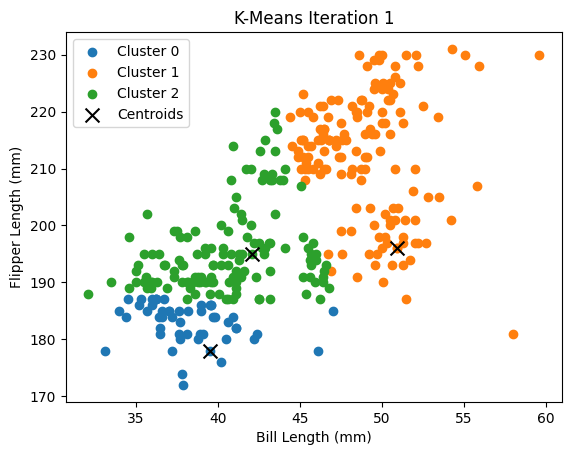

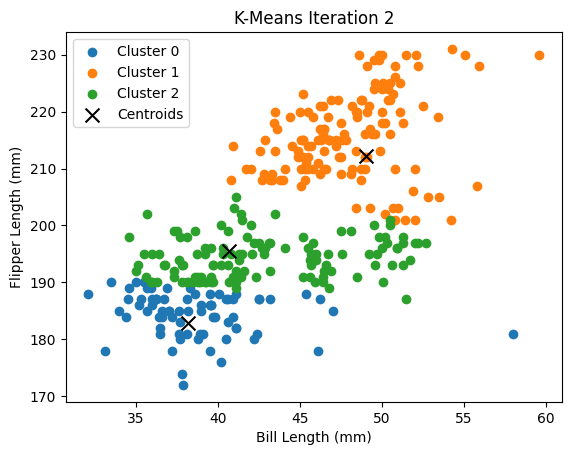

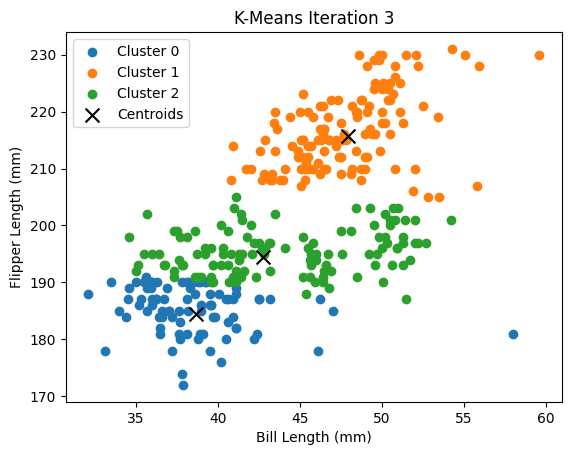

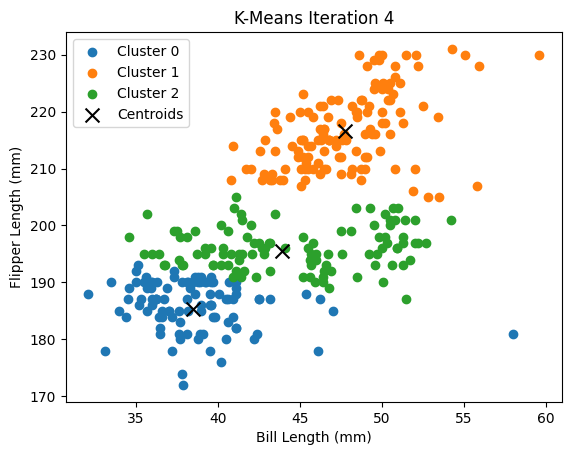

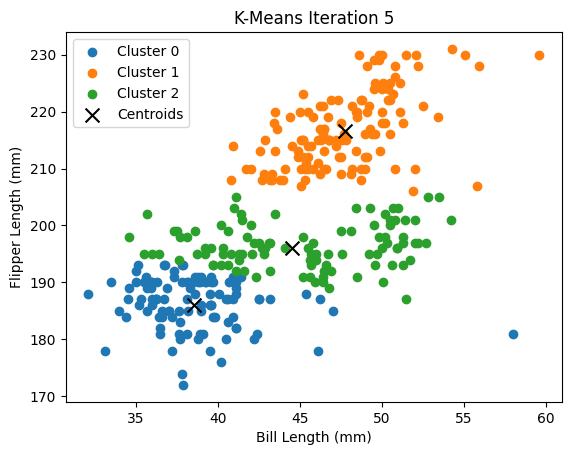

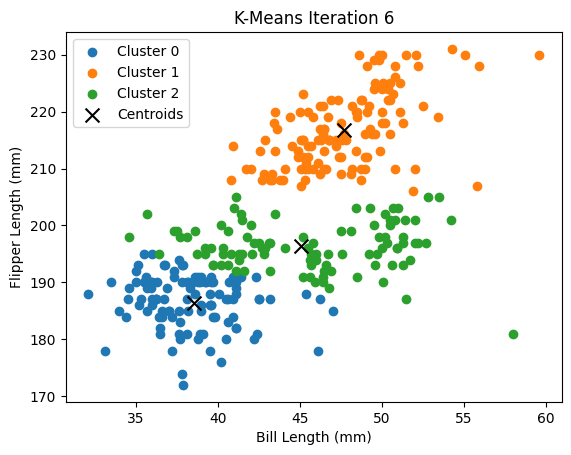

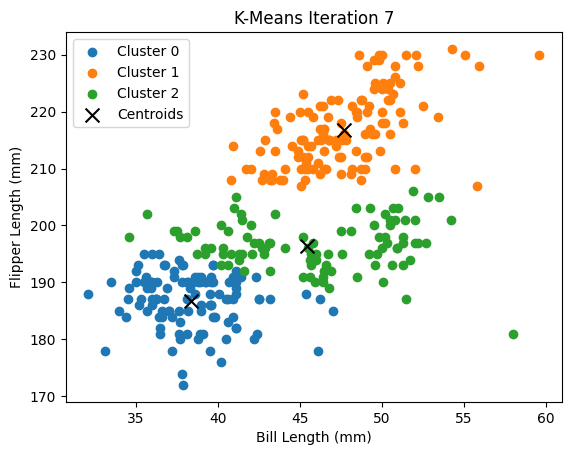

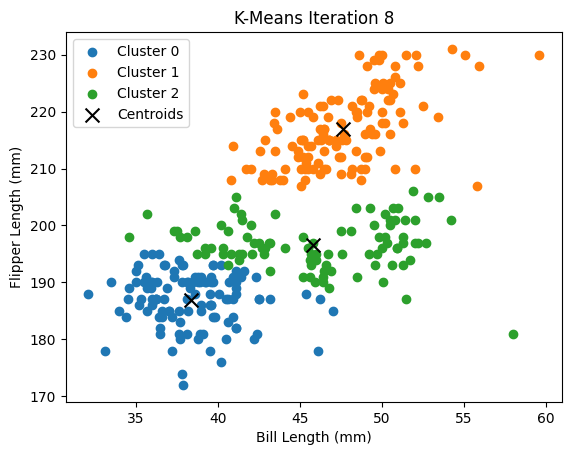

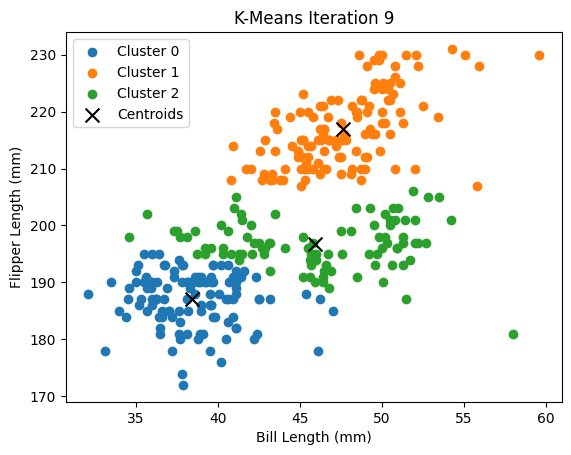

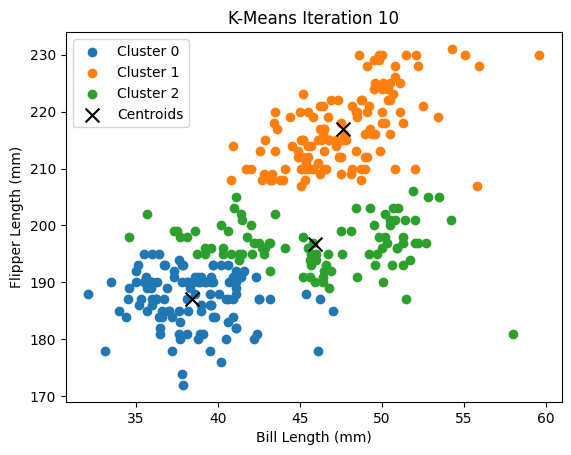

In [2]:
from IPython.display import display
for i, (centroids_step, labels_step) in enumerate(history):
    fig, ax = plt.subplots()
    for j in np.unique(labels_step):
        cluster_points = X[labels_step == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {j}")
    ax.scatter(centroids_step[:, 0], centroids_step[:, 1], c='black', s=100, marker='x', label='Centroids')
    ax.set_title(f"K-Means Iteration {i+1}")
    ax.set_xlabel("Bill Length (mm)")
    ax.set_ylabel("Flipper Length (mm)")
    ax.legend()
    plt.show()

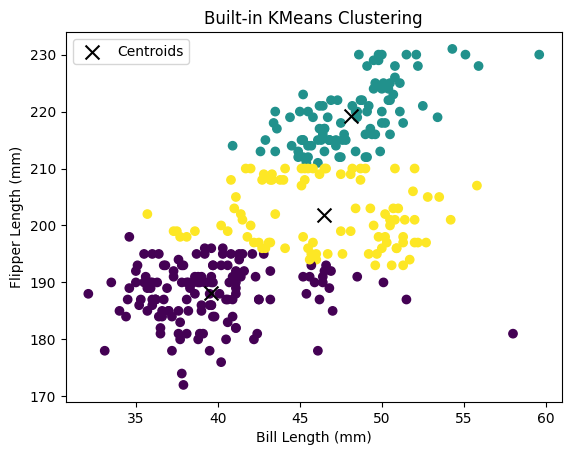

In [3]:
from sklearn.cluster import KMeans

kmeans_builtin = KMeans(n_clusters=3, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_builtin.labels_)
plt.scatter(kmeans_builtin.cluster_centers_[:, 0], kmeans_builtin.cluster_centers_[:, 1],
            c='black', marker='x', s=100, label='Centroids')
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Built-in KMeans Clustering")
plt.legend()
plt.show()

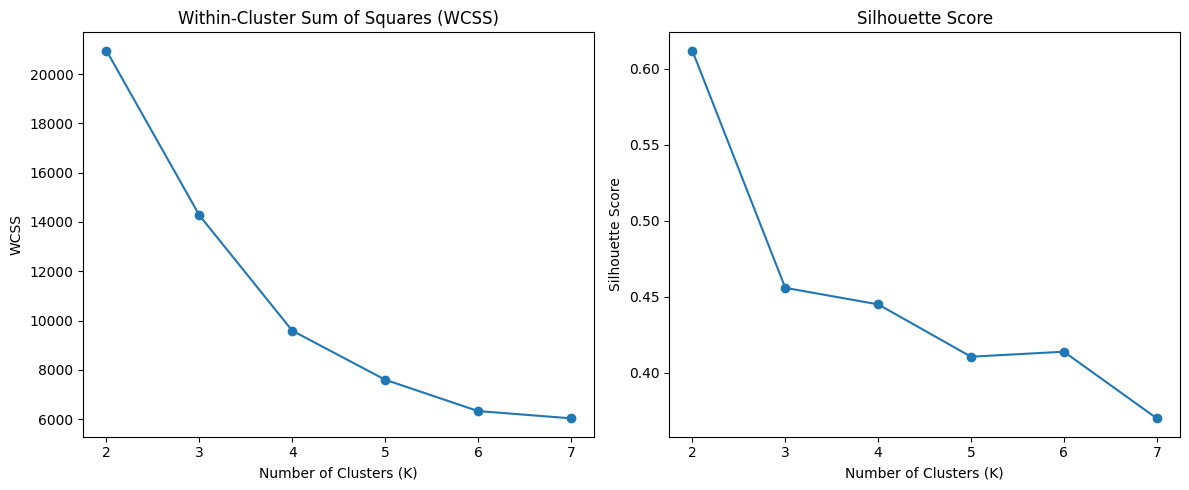

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare data
penguins = pd.read_csv("palmer_penguins.csv")
X = penguins[['bill_length_mm', 'flipper_length_mm']].dropna().to_numpy()

# Initialize result lists
wcss = []
silhouette_scores = []

# Try K from 2 to 7
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Assume `history` contains the centroid and label history from custom_kmeans()
# history = [(centroids, labels), ...]

# Create output directory for frames
os.makedirs("kmeans_frames", exist_ok=True)

# Plot and save each iteration as a frame
for i, (centroids, labels) in enumerate(history):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X')
    ax.set_title(f"K-Means Iteration {i}")
    ax.set_xlabel("Bill Length (mm)")
    ax.set_ylabel("Flipper Length (mm)")
    plt.savefig(f"kmeans_frames/frame_{i:02d}.png")
    plt.close()

# Combine frames into a GIF
import imageio.v2 as imageio  # Ensure compatibility
with imageio.get_writer("kmeans_animation.gif", mode='I', duration=0.8, loop=0) as writer:
    for i in range(len(history)):
        image = imageio.imread(f"kmeans_frames/frame_{i:02d}.png")
        writer.append_data(image)

# Optional: Clean up frame images
import shutil
shutil.rmtree("kmeans_frames")